### EDA with PCA

Exploratory data analysis refers to critical process of performing initial investigation on data.
In order to understand patterns, outliers, with the help of summary statistics
and graphical representation.
It is an approach for analysing data to summarize their significant statistical characteristics generally through visual method.
EDA helps to analyse the relationship between different features for supervised learning. It helps in understanding the strength of relationship between output variable and input features. This helps in selecting the suitable modelling technique.
EDA also helps in understanding the amount pf preprocessing needed on the dataset
EDA is majorly perform using the following methods:
i) Univariate analysis
ii) Bivariate analysis
iii) Multi-variate analysis


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("winequality-white.csv", sep = ';')
#as the values are  ; separated
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [4]:
df.shape

(4898, 12)

In [5]:
df.columns.values

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

In [6]:
df.info() #to find out the datatype and the missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.2 KB


In [7]:
df.describe() #it gives us the summary statistics
#compare mean values with 50% (mean is a bit higher compared to 50% median value)
#compare max values with 75% ()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


For the column residual sugar, free sulfur dioxide and  total sulfur dioxide there is a large difference between the max value and the 75% value. Hence we can say that these columns might result in as a outlier

In [8]:
df.quality.unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

As we can see the target variables(quality) is a categorical and it contains ratings in range 1 to 10

In [9]:
df.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

Most values belong to 6, 5 and 7 category and very less observation belonging to category 3 & 9

# Data visualization

<AxesSubplot:>

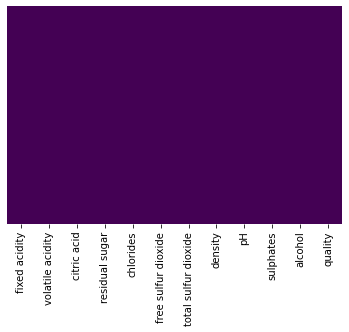

In [10]:
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap = 'viridis')

Since there is only one color shade it indicates that there is no missing values. 

<AxesSubplot:>

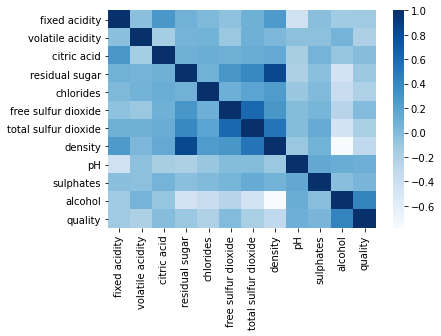

In [11]:
plt.figure(figsize = (6, 4))
sns.heatmap(df.corr(), cmap = 'Blues', annot = False)

<AxesSubplot:>

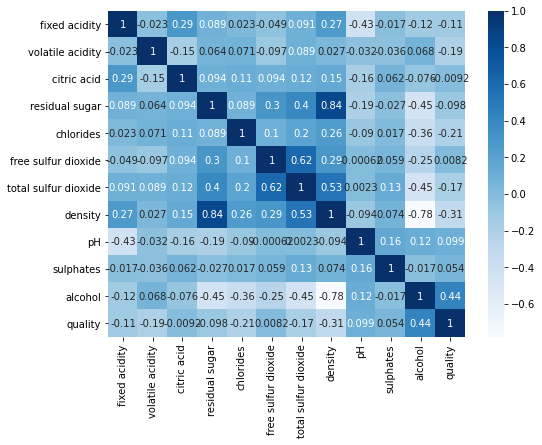

In [12]:
plt.figure(figsize = (8, 6))
sns.heatmap(df.corr(), cmap = 'Blues', annot = True)

There is a strong positive relation between residual sugar and density.
And there is weak relation between density and quality and also chloride and quality so therefore 

In [13]:
df.corr() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


# PCA

In [14]:
from sklearn.decomposition import PCA

In [15]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [16]:
x = df.iloc[:, 0:11]
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [17]:
y = df.iloc[:, -1].values
y

array([6, 6, 6, ..., 6, 7, 6], dtype=int64)

In [18]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
dtypes: float64(11)
memory usage: 421.0 KB


In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
x = StandardScaler().fit_transform(x)

In [21]:
x = pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203


In [22]:
pca = PCA()
x_pca = pca.fit_transform(x)
x_pca = pd.DataFrame(x_pca)
x_pca.head()

,0,1,2,3,4,5,6,7,8,9,10
0,3.676944,-0.545233,-0.930422,-1.135374,-0.292855,-0.891620,0.204664,-1.025184,0.150609,-0.075905,0.042190
1,-0.644588,0.430770,-0.356331,0.999117,-0.714078,-0.483738,0.436998,0.584930,-1.063550,-0.253919,0.127904
2,0.155291,-1.189800,-0.017532,0.270219,-0.367706,-0.500682,0.554319,0.974902,0.549654,0.855570,-0.184295
3,1.455374,0.099680,-0.001956,-0.423022,-0.469981,0.769261,-0.197702,0.601653,0.293244,-0.403700,-0.045274
4,1.455374,0.099680,-0.001956,-0.423022,-0.469981,0.769261,-0.197702,0.601653,0.293244,-0.403700,-0.045274


In [23]:
print("Explained Variance:", pca.explained_variance_)
print("Proportion ecxplained variance:", pca.explained_variance_ratio_)

Explained Variance: [3.2229119  1.57556161 1.22192081 1.01873034 0.97353334 0.93893321
 0.7267464  0.59948087 0.41422824 0.28954625 0.0206533 ]
Proportion ecxplained variance: [0.29293217 0.14320363 0.11106103 0.09259294 0.08848496 0.08534014
 0.06605437 0.05448713 0.03764942 0.02631701 0.00187719]


In [24]:
np.cumsum(pca.explained_variance_ratio_)

array([0.29293217, 0.4361358 , 0.54719683, 0.63978977, 0.72827474,
       0.81361487, 0.87966924, 0.93415637, 0.9718058 , 0.99812281,
       1.        ])

In [25]:
x_pca['target'] = y
x_pca.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9',
                 'PC10', 'PC11', 'target']
x_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,target
0,3.676944,-0.545233,-0.930422,-1.135374,-0.292855,-0.891620,0.204664,-1.025184,0.150609,-0.075905,0.042190,6
1,-0.644588,0.430770,-0.356331,0.999117,-0.714078,-0.483738,0.436998,0.584930,-1.063550,-0.253919,0.127904,6
2,0.155291,-1.189800,-0.017532,0.270219,-0.367706,-0.500682,0.554319,0.974902,0.549654,0.855570,-0.184295,6
3,1.455374,0.099680,-0.001956,-0.423022,-0.469981,0.769261,-0.197702,0.601653,0.293244,-0.403700,-0.045274,6
4,1.455374,0.099680,-0.001956,-0.423022,-0.469981,0.769261,-0.197702,0.601653,0.293244,-0.403700,-0.045274,6


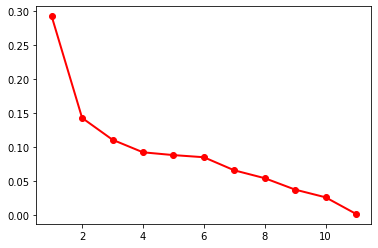

In [26]:
pc_values = np.arange(pca.n_components_) + 1
plt.plot(pc_values, pca.explained_variance_ratio_, 'ro-', linewidth = 2)


In [27]:
loading = pd.DataFrame(pca.components_.T, 
                       columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6',
                                  'PC7', 'PC8', 'PC9', 'PC10', 'PC11'],
                       index = x.columns)

In [28]:
loading

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,0.157218,-0.587558,0.121368,0.018584,0.251048,-0.103531,-0.197849,0.588355,0.330523,0.131705,-0.171290
1,0.005089,0.051728,-0.590971,0.274115,0.642617,0.122338,0.269355,0.028373,-0.145910,0.223722,-0.017057
2,0.144050,-0.345295,0.504397,0.148514,0.053905,0.132097,0.705481,-0.152287,-0.202011,0.037351,-0.009721
3,0.427408,0.008749,-0.214320,-0.273765,0.011391,-0.289447,0.212760,-0.388186,0.408969,-0.094468,-0.490226
4,0.212011,-0.008800,-0.102367,0.710712,-0.328628,0.395821,-0.079484,-0.100151,0.393535,-0.053374,-0.025399
5,0.300334,0.290355,0.279410,-0.305585,0.176912,0.494494,-0.166779,-0.081799,0.144073,0.567451,0.030908
6,0.406652,0.244032,0.124375,-0.060456,0.293010,0.276320,-0.067730,0.247314,-0.154540,-0.709120,-0.035561
7,0.511524,0.006297,-0.129203,-0.022061,-0.084588,-0.327651,0.110385,0.069026,0.087888,0.068374,0.759779
8,-0.128832,0.581344,0.126672,0.097753,-0.119826,-0.193341,0.427313,0.533881,0.261298,0.110733,-0.141197
9,0.043379,0.222695,0.433244,0.442060,0.400585,-0.481039,-0.308562,-0.270394,-0.011698,0.057708,-0.041833


PC1 = density, PC2 = pH, PC3 = citric acid, PC4 = cholrides, PC5 = volatile acidity, PC6 = free sulfur dioixde 

# K-Means Clustering for all the columns

In [29]:
from sklearn.cluster import KMeans

In [30]:
distortion = []
k = range(1, 15)
for i in k:
    kmean_model = KMeans(n_clusters = i, max_iter = 25)
    kmean_model.fit(x)
    distortion.append(kmean_model.inertia_)

Text(0.5, 1.0, 'Elbow Method')

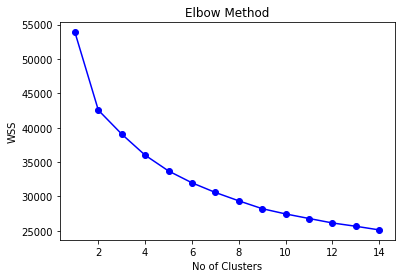

In [31]:
plt.plot(figure = (16,8))
plt.plot(k, distortion, 'bo-')
plt.xlabel('No of Clusters')
plt.ylabel('WSS')
plt.title('Elbow Method')

In [32]:
kmean_model_final = KMeans(n_clusters = 6)
kmean_model_final.fit(x)

KMeans(n_clusters=6)

In [33]:
x['KMeans'] = kmean_model_final.predict(x)
x['target'] = y

Text(0.5, 1.0, 'KMeans')

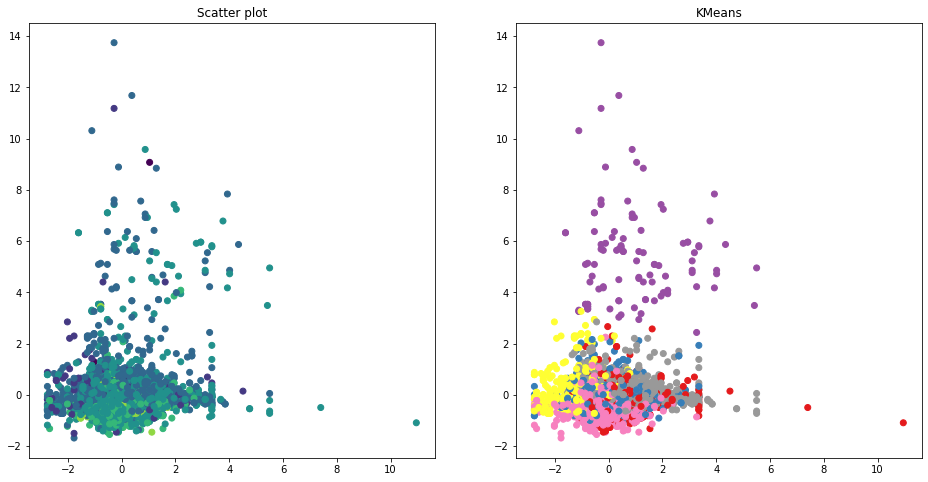

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(x[2], x[4], c = x['target'])
axes[0].set_title('Scatter plot')
axes[1].scatter(x[2], x[4], c = x['KMeans'], cmap = plt.cm.Set1)
axes[1].set_title('KMeans')

In [35]:
x[['KMeans', 'target']]

,KMeans,target
0,5,6
1,1,6
2,0,6
3,5,6
4,5,6
...,...,...
4893,4,6
4894,5,5
4895,3,6
4896,4,7


In [36]:
x_pca_trial = x_pca.iloc[:, 0:7]
x_pca_trial

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,3.676944,-0.545233,-0.930422,-1.135374,-0.292855,-0.891620,0.204664
1,-0.644588,0.430770,-0.356331,0.999117,-0.714078,-0.483738,0.436998
2,0.155291,-1.189800,-0.017532,0.270219,-0.367706,-0.500682,0.554319
3,1.455374,0.099680,-0.001956,-0.423022,-0.469981,0.769261,-0.197702
4,1.455374,0.099680,-0.001956,-0.423022,-0.469981,0.769261,-0.197702
...,...,...,...,...,...,...,...
4893,-2.094367,0.390789,0.325364,0.088145,-0.755337,-0.283772,-0.108921
4894,1.295014,0.490753,-0.066307,-0.381234,0.267347,0.839791,0.033669
4895,-0.779731,-0.408480,-0.664677,-0.134766,-0.808279,0.133791,-1.616482
4896,-3.407302,0.915744,-0.268297,-0.762126,-0.080705,0.497135,0.978533


In [37]:
kmean_model_final = KMeans(n_clusters = 6)
kmean_model_final.fit(x_pca_trial)

KMeans(n_clusters=6)

In [38]:
x_pca_trial['KMeans'] = kmean_model_final.predict(x_pca_trial)
x_pca_trial['target'] = y

Text(0.5, 1.0, 'KMeans')

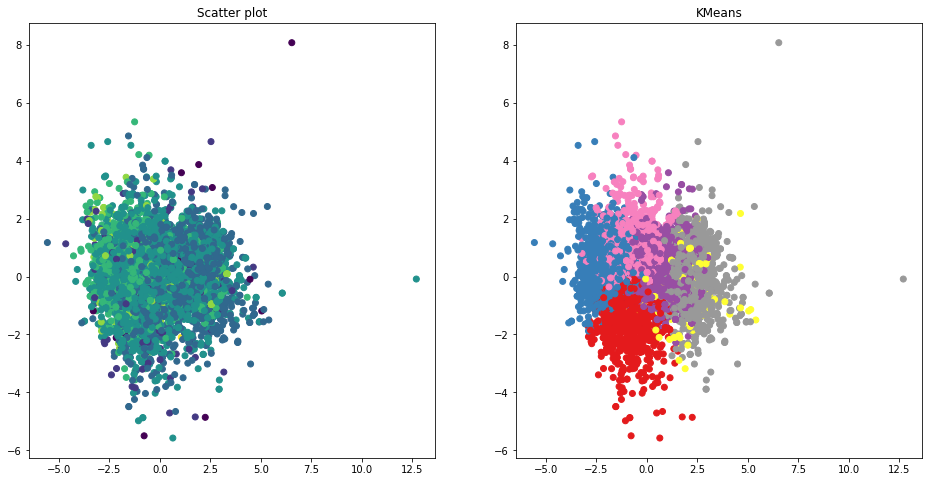

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(x_pca_trial['PC1'], x_pca_trial['PC2'], c = x_pca_trial['target'])
axes[0].set_title('Scatter plot')
axes[1].scatter(x_pca_trial['PC1'], x_pca_trial['PC2'], c = x_pca_trial['KMeans'],
                cmap = plt.cm.Set1)
axes[1].set_title('KMeans')

In [40]:
x_pca_trial[['KMeans', 'target']]

,KMeans,target
0,5,6
1,4,6
2,0,6
3,5,6
4,5,6
...,...,...
4893,1,6
4894,5,5
4895,0,6
4896,1,7


# K-Means Clustering for principal components

In [41]:
x_pca_trial2 = x.iloc[:, [1,2,4,5,7,8]]
x_pca_trial2.head()

,1,2,4,5,7,8
0,-0.081770,0.213280,-0.035355,0.569932,2.331512,-1.246921
1,0.215896,0.048001,0.147747,-1.253019,-0.009154,0.740029
2,0.017452,0.543838,0.193523,-0.312141,0.358665,0.475102
3,-0.478657,-0.117278,0.559727,0.687541,0.525855,0.011480
4,-0.478657,-0.117278,0.559727,0.687541,0.525855,0.011480


In [42]:
x_pca_trial2.columns = ['volatile acidity', 'citric acid', 'chlorides',
                       'free sulfur dioxide', 'density', 'pH']
x_pca_trial2.head()

,volatile acidity,citric acid,chlorides,free sulfur dioxide,density,pH
0,-0.081770,0.213280,-0.035355,0.569932,2.331512,-1.246921
1,0.215896,0.048001,0.147747,-1.253019,-0.009154,0.740029
2,0.017452,0.543838,0.193523,-0.312141,0.358665,0.475102
3,-0.478657,-0.117278,0.559727,0.687541,0.525855,0.011480
4,-0.478657,-0.117278,0.559727,0.687541,0.525855,0.011480


In [43]:
kmean_model_final = KMeans(n_clusters = 6)
kmean_model_final.fit(x_pca_trial2)

KMeans(n_clusters=6)

In [44]:
x_pca_trial2['KMeans'] = kmean_model_final.predict(x_pca_trial2)
x_pca_trial2['target'] = y

Text(0.5, 1.0, 'KMeans')

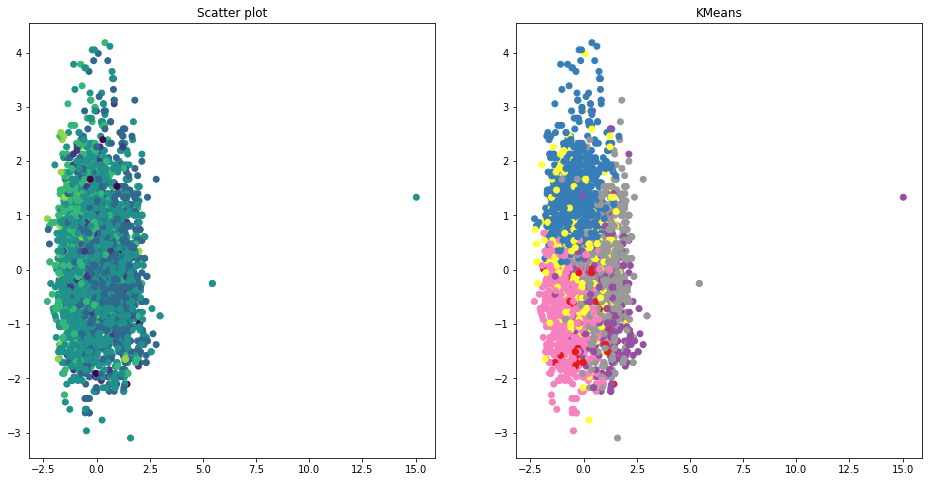

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(x_pca_trial2['density'], x_pca_trial2['pH'],
                c = x_pca_trial2['target'])
axes[0].set_title('Scatter plot')
axes[1].scatter(x_pca_trial2['density'], x_pca_trial2['pH'],
                c = x_pca_trial2['KMeans'],
                cmap = plt.cm.Set1)
axes[1].set_title('KMeans')

In [46]:
x_pca_trial2[['KMeans', 'target']]

,KMeans,target
0,5,6
1,1,6
2,1,6
3,5,6
4,5,6
...,...,...
4893,1,6
4894,5,5
4895,4,6
4896,1,7
